In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import csv
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
trained=pd.read_excel('https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Restaurant%20Food%20Cost/Data_Train.xlsx')
test=pd.read_excel('https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Restaurant%20Food%20Cost/Data_Test.xlsx')

In [4]:
trained

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [92]:
trained.shape

(12690, 9)

In [93]:
trained['CUISINES'].value_counts(normalize=True)


South Indian                                  0.041923
North Indian                                  0.041450
North Indian, Chinese                         0.039480
Fast Food                                     0.022537
Chinese                                       0.013160
                                                ...   
Italian, Biryani, Fast Food                   0.000079
Desserts, Juices, Fast Food                   0.000079
Asian, Continental, European, North Indian    0.000079
Cafe, Continental, Italian, Lebanese          0.000079
Finger Food, Continental, Asian, Chinese      0.000079
Name: CUISINES, Length: 4155, dtype: float64

In [94]:
trained['RESTAURANT_ID'].value_counts(normalize=True)


7264     0.000630
4634     0.000552
9910     0.000473
11971    0.000394
12747    0.000394
           ...   
9069     0.000079
6573     0.000079
7430     0.000079
6381     0.000079
6134     0.000079
Name: RESTAURANT_ID, Length: 11892, dtype: float64

In [95]:
trained['TIME'].value_counts(normalize=True)


11am – 11pm (Mon-Sun)                                 0.111505
12noon – 12midnight (Mon-Sun)                         0.036958
12noon – 11pm (Mon-Sun)                               0.032072
11am – 12midnight (Mon-Sun)                           0.024429
10am – 10pm (Mon-Sun)                                 0.017415
                                                        ...   
10am – 10pm (Mon-Fri),8:30am – 10pm (Sat-Sun)         0.000079
12noon – 3:30pm, 6pm – 10:30pm (Mon-Thu),12noon...    0.000079
12noon – 5:30pm, 7pm – 11pm (Mon-Sun)                 0.000079
12midnight – 11:45pm (Mon-Sun)                        0.000079
12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...       0.000079
Name: TIME, Length: 2689, dtype: float64

In [96]:
trained['CITY'].value_counts(normalize=True)


Chennai                                                                           0.172841
Bangalore                                                                         0.170854
Hyderabad                                                                         0.144618
Mumbai                                                                            0.136906
New Delhi                                                                         0.105025
                                                                                    ...   
Gachibowli Hyderabad                                                              0.000080
CPR layout harlur main road opposite to ozone ever green apartment Bangalore -    0.000080
ECR NEELANKARAI Chennai 600115                                                    0.000080
ward X11                                                                          0.000080
Masab Tank                                                                        0.000080

In [97]:
trained['LOCALITY'].value_counts(normalize=True)

Gachibowli                 0.013183
Indiranagar                0.010959
Edappally                  0.009689
Kakkanad                   0.009609
HSR                        0.009530
                             ...   
Huda Market                0.000079
OMR Road Sholinganallur    0.000079
Telangana 500053           0.000079
1st Lane                   0.000079
Near Malviya Nagar         0.000079
Name: LOCALITY, Length: 1416, dtype: float64

In [5]:
test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [6]:
trained.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [7]:
trained.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400
12689,CASUAL DINING,6430,"North Indian, Chinese",12:30pm – 11pm (Mon-Sun),Hyderabad,Vanasthalipuram,3.4,677 votes,600


In [8]:
test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [9]:
test.tail()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN
4230,QUICK BITES,2421,Mughlai,5pm – 1am (Mon-Sun),Bandra West,Perry Cross Road,3.7,63 votes


In [11]:
trained.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


In [12]:
test.describe()

,RESTAURANT_ID
count,4231.000000
mean,7791.438431
std,4458.797621
min,3.000000
25%,3908.500000
50%,7798.000000
75%,11634.000000
max,15572.000000


<Axes: xlabel='RESTAURANT_ID'>

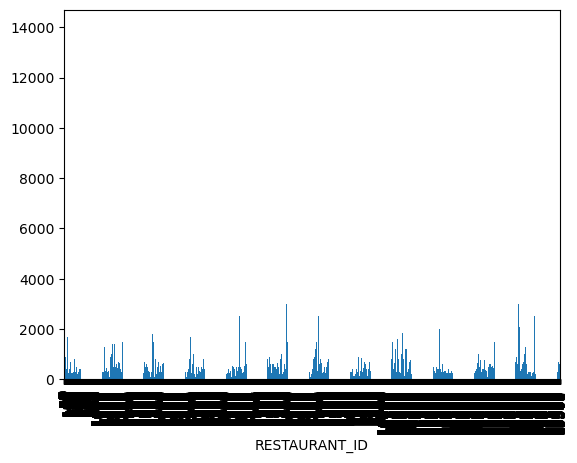

In [66]:
trained.groupby(['RESTAURANT_ID'])['COST'].mean().plot(kind='bar')

In [68]:
trained['TITLE'].nunique()

113

In [69]:
trained['RESTAURANT_ID'].nunique()

11892

In [70]:
trained['CUISINES'].nunique()

4155

In [71]:
trained['TIME'].nunique()

2689

In [72]:
trained['CITY'].nunique()

359

In [73]:
trained['LOCALITY'].nunique()

1416

In [74]:
trained['RATING'].nunique()

32

In [75]:
trained['VOTES'].nunique()

1847

In [76]:
trained['COST'].nunique()

86

In [77]:
trained['CITY'].value_counts()

Chennai                                                                           2174
Bangalore                                                                         2149
Hyderabad                                                                         1819
Mumbai                                                                            1722
New Delhi                                                                         1321
                                                                                  ... 
Gachibowli Hyderabad                                                                 1
CPR layout harlur main road opposite to ozone ever green apartment Bangalore -       1
ECR NEELANKARAI Chennai 600115                                                       1
ward X11                                                                             1
Masab Tank                                                                           1
Name: CITY, Length: 359, dtype: int64

In [82]:
trained.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [54]:
combined_data=pd.concat([trained,test],ignore_index=True)

In [55]:
combined_data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0
...,...,...,...,...,...,...,...,...,...
16916,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN
16917,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN
16918,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN
16919,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN


In [18]:
trained.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [20]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16921 non-null  object 
 1   RESTAURANT_ID  16921 non-null  int64  
 2   CUISINES       16921 non-null  object 
 3   TIME           16921 non-null  object 
 4   CITY           16774 non-null  object 
 5   LOCALITY       16793 non-null  object 
 6   RATING         16917 non-null  object 
 7   VOTES          15315 non-null  object 
 8   COST           12690 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.3+ MB


In [21]:
combined_data.describe()

,RESTAURANT_ID,COST
count,16921.000000,12690.000000
mean,7767.211631,655.252246
std,4493.287626,627.003540
min,0.000000,20.000000
25%,3873.000000,300.000000
50%,7751.000000,500.000000
75%,11672.000000,800.000000
max,15573.000000,14000.000000


In [22]:
combined_data.duplicated().sum()

26

In [23]:
combined_data=combined_data.drop_duplicates()

In [24]:
combined_data

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0
...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN


In [49]:
combined_data.drop(['RESTAURANT_ID','TIME'],axis=1,inplace=True)

AttributeError: 'list' object has no attribute 'drop'

In [ ]:
del combined_data

In [53]:
combined_data['CITY']=combined_data['CITY'].astype=(int)

TypeError: list indices must be integers or slices, not str

In [56]:
combined_data.drop(['RESTAURANT_ID', 'TIME'], axis=1, inplace=True)


In [57]:
combined_data

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,49 votes,1200.0
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,30 votes,1500.0
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221 votes,800.0
3,QUICK BITES,"Tibetan, Chinese",Mumbai,Bandra West,4.1,24 votes,800.0
4,DESSERT PARLOR,Desserts,Mumbai,Lower Parel,3.8,165 votes,300.0
...,...,...,...,...,...,...,...
16916,CASUAL DINING,"North Indian, Mughlai, Chinese",New Delhi,Punjabi Bagh,3.9,287 votes,NaN
16917,None,"Biryani, North Indian, Sandwich, Salad, Wraps",Bangalore,HSR Layout,4.3,469 votes,NaN
16918,QUICK BITES,"Continental, North Indian",Faridabad,Sector 86,3.7,53 votes,NaN
16919,QUICK BITES,"Rolls, Beverages",Kochi,Kochi,-,NaN,NaN


In [50]:
del combined_data['CITY']



TypeError: list indices must be integers or slices, not str

In [52]:
combined_data.pop('LOCALITY')

TypeError: 'str' object cannot be interpreted as an integer

In [25]:
combined_data.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1602
COST             4230
dtype: int64

In [58]:
combined_data['place']=combined_data['CITY']+' '+combined_data['LOCALITY']

In [59]:
combined_data

,TITLE,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,place
0,CASUAL DINING,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,49 votes,1200.0,Thane Dombivali East
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,30 votes,1500.0,Chennai Ramapuram
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221 votes,800.0,Chennai Saligramam
3,QUICK BITES,"Tibetan, Chinese",Mumbai,Bandra West,4.1,24 votes,800.0,Mumbai Bandra West
4,DESSERT PARLOR,Desserts,Mumbai,Lower Parel,3.8,165 votes,300.0,Mumbai Lower Parel
...,...,...,...,...,...,...,...,...
16916,CASUAL DINING,"North Indian, Mughlai, Chinese",New Delhi,Punjabi Bagh,3.9,287 votes,NaN,New Delhi Punjabi Bagh
16917,None,"Biryani, North Indian, Sandwich, Salad, Wraps",Bangalore,HSR Layout,4.3,469 votes,NaN,Bangalore HSR Layout
16918,QUICK BITES,"Continental, North Indian",Faridabad,Sector 86,3.7,53 votes,NaN,Faridabad Sector 86
16919,QUICK BITES,"Rolls, Beverages",Kochi,Kochi,-,NaN,NaN,Kochi Kochi


In [60]:
combined_data.drop(['CITY', 'LOCALITY'], axis=1, inplace=True)

In [61]:
combined_data

,TITLE,CUISINES,RATING,VOTES,COST,place
0,CASUAL DINING,"Malwani, Goan, North Indian",3.6,49 votes,1200.0,Thane Dombivali East
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",4.2,30 votes,1500.0,Chennai Ramapuram
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi",3.8,221 votes,800.0,Chennai Saligramam
3,QUICK BITES,"Tibetan, Chinese",4.1,24 votes,800.0,Mumbai Bandra West
4,DESSERT PARLOR,Desserts,3.8,165 votes,300.0,Mumbai Lower Parel
...,...,...,...,...,...,...
16916,CASUAL DINING,"North Indian, Mughlai, Chinese",3.9,287 votes,NaN,New Delhi Punjabi Bagh
16917,None,"Biryani, North Indian, Sandwich, Salad, Wraps",4.3,469 votes,NaN,Bangalore HSR Layout
16918,QUICK BITES,"Continental, North Indian",3.7,53 votes,NaN,Faridabad Sector 86
16919,QUICK BITES,"Rolls, Beverages",-,NaN,NaN,Kochi Kochi


In [65]:
combined_data.dtypes

TITLE        object
CUISINES     object
RATING       object
VOTES        object
COST        float64
place        object
dtype: object

In [98]:
trained.corr()

,RESTAURANT_ID,COST
RESTAURANT_ID,1.00000,0.04071
COST,0.04071,1.00000


<Axes: >

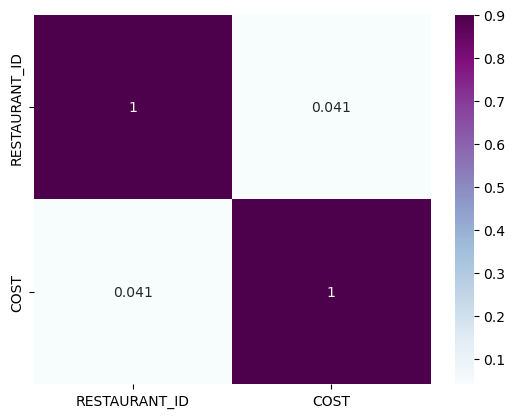

In [101]:
sns.heatmap(trained.corr(),cmap='BuPu',vmax=0.9,annot=True)

In [85]:
test.corr()

,RESTAURANT_ID
RESTAURANT_ID,1.0


In [86]:
combined_data.corr()

,COST
COST,1.0


In [102]:
combined_data

,TITLE,CUISINES,RATING,VOTES,COST,place
0,CASUAL DINING,"Malwani, Goan, North Indian",3.6,49 votes,1200.0,Thane Dombivali East
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",4.2,30 votes,1500.0,Chennai Ramapuram
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi",3.8,221 votes,800.0,Chennai Saligramam
3,QUICK BITES,"Tibetan, Chinese",4.1,24 votes,800.0,Mumbai Bandra West
4,DESSERT PARLOR,Desserts,3.8,165 votes,300.0,Mumbai Lower Parel
...,...,...,...,...,...,...
16916,CASUAL DINING,"North Indian, Mughlai, Chinese",3.9,287 votes,NaN,New Delhi Punjabi Bagh
16917,None,"Biryani, North Indian, Sandwich, Salad, Wraps",4.3,469 votes,NaN,Bangalore HSR Layout
16918,QUICK BITES,"Continental, North Indian",3.7,53 votes,NaN,Faridabad Sector 86
16919,QUICK BITES,"Rolls, Beverages",-,NaN,NaN,Kochi Kochi


In [104]:
combined_data.isna().sum()

TITLE          0
CUISINES       0
RATING         4
VOTES       1606
COST        4231
place        148
dtype: int64

In [105]:
combined_data['Rating']=combined_data['Rating'].fillna(0)

KeyError: 'Rating'